In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import torch

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline 
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam


import numpy as np

#matplotlib 에서 inline함수는 그림을 보여줌

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Pasteur_new_data.csv") 

In [10]:
df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
STD_DT                0
MIXA_PASTEUR_STATE    0
MIXB_PASTEUR_STATE    0
MIXA_PASTEUR_TEMP     0
MIXB_PASTEUR_TEMP     0
INSP                  0
dtype: int64

In [11]:
df = df.replace({'INSP' : 'OK'}, 1) 
df = df.replace({'INSP' : 'NG'}, 0) 

In [14]:
data = df[['MIXA_PASTEUR_STATE',	'MIXB_PASTEUR_STATE',	'MIXA_PASTEUR_TEMP',	'MIXB_PASTEUR_TEMP' ]].to_numpy()
target = df['INSP'].to_numpy()

In [30]:
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      test_size=0.25,
                                                                      stratify=df['INSP'])

In [32]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_input,
                                                                      train_target, 
                                                                      test_size=0.25,
                                                                      random_state=42)

In [33]:
# 여기부터 kfold
inputs = np.concatenate((train_scaled, test_input), axis=0)
targets = np.concatenate((train_target, test_target), axis=0)

In [35]:
print(inputs.shape)
print(targets.shape)

(7705, 4)
(7705,)


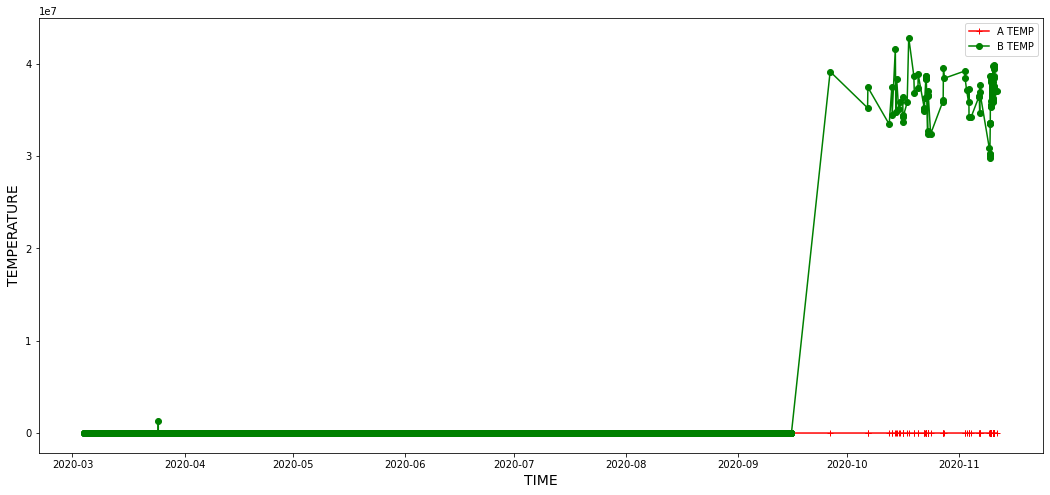

In [47]:
df['STD_DT'] = pd.to_datetime(df['STD_DT'])
df = df.set_index("STD_DT")
fig = plt.figure(figsize=(18, 8))
fig.set_facecolor('white')
ax = fig.add_subplot()
 
ax.plot(df['MIXA_PASTEUR_TEMP'],marker='+', color='r', label='A TEMP') 
ax.plot(df['MIXB_PASTEUR_TEMP'],marker='o', color='g', label='B TEMP')

plt.ylabel('TEMPERATURE', fontsize=14)
plt.xlabel('TIME', fontsize=14)
ax.legend()

plt.show()

In [36]:
kfold = KFold(n_splits=10, shuffle=True)

In [37]:
fold_no = 1
acc_per_fold =[] 
loss_per_fold =[]

In [38]:
for train, test in kfold.split(inputs, targets):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(nb_features,)))
  model.add(keras.layers.Dense(100, activation='sigmoid'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(100, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(nb_classes,activation='softmax'))

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
  
  print('---------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
  history = model.fit(train_scaled,train_target,
                    batch_size=256, 
                    epochs=2000, 
                    callbacks=[early_stopping],
                    validation_data = (val_scaled, val_target))
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no} : {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1]*100)
  loss_per_fold.append(scores[0])

  fold_no = fold_no +1
  # 요까지 kfold

---------------------------------------------------
Training for fold 1 ...
Epoch 1/2000
21/21 [==============================] - 1s 12ms/step - loss: 0.7248 - accuracy: 0.7621 - val_loss: 0.4301 - val_accuracy: 0.8549
Epoch 2/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.5197 - accuracy: 0.8210 - val_loss: 0.3773 - val_accuracy: 0.8549
Epoch 3/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.8376 - val_loss: 0.3556 - val_accuracy: 0.8549
Epoch 4/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.4553 - accuracy: 0.8472 - val_loss: 0.3446 - val_accuracy: 0.8560
Epoch 5/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8532 - val_loss: 0.3374 - val_accuracy: 0.8853
Epoch 6/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.8521 - val_loss: 0.3296 - val_accuracy: 0.8915
Epoch 7/2000
21/21 [==============================] - 0s 4ms/step - los

KeyboardInterrupt: ignored

In [39]:
nb_features = train_scaled.shape[1] # 뉴런갯수
nb_classes  = test_input.shape[1]

In [40]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(nb_features,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
# model.add(keras.layers.Dropout(0.5))
# model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(nb_classes,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 4)                 0         
                                                                 
 dense_16 (Dense)            (None, 100)               500       
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 4)                 404       
                                                                 
Total params: 904
Trainable params: 904
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# y_pred = model.predict(test_input)

In [ ]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(test_target, pred)

In [ ]:
# '''모델 평가'''
# from sklearn.metrics import classification_report
# y_pred = model.predict(test_input) # 확률값 

# preds_1d = y_pred.flatten() # 차원 펴주기
# pred_class = np.where(preds_1d > 0.2, 1 , 0) #0.5보다크면 1, 작으면 0

# print(classification_report(test_target, pred_class))

In [ ]:
#test_target[:50]

In [ ]:
#pred_class[:50]

In [41]:
#sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [43]:

early_stopping = EarlyStopping(monitor='val_loss', patience = 10)

history = model.fit(train_scaled,train_target,
                    batch_size=256, 
                    epochs=1000, 
                    #callbacks=[early_stopping],
                    validation_data = (val_scaled, val_target))

Epoch 1/2000
21/21 [==============================] - 0s 6ms/step - loss: 0.4077 - accuracy: 0.8665 - val_loss: 0.3248 - val_accuracy: 0.8965
Epoch 2/2000
21/21 [==============================] - 0s 10ms/step - loss: 0.3887 - accuracy: 0.8703 - val_loss: 0.3229 - val_accuracy: 0.8965
Epoch 3/2000
21/21 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.8733 - val_loss: 0.3215 - val_accuracy: 0.8954
Epoch 4/2000
21/21 [==============================] - 0s 9ms/step - loss: 0.3874 - accuracy: 0.8735 - val_loss: 0.3228 - val_accuracy: 0.8965
Epoch 5/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8736 - val_loss: 0.3192 - val_accuracy: 0.8965
Epoch 6/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.3695 - accuracy: 0.8774 - val_loss: 0.3180 - val_accuracy: 0.9044
Epoch 7/2000
21/21 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8765 - val_loss: 0.3171 - val_accuracy: 0.9044
Epoch

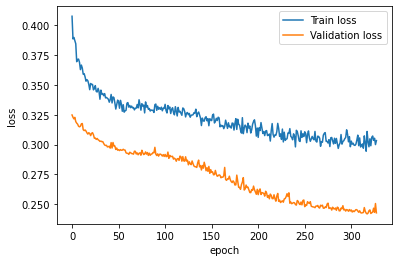

In [44]:
plt.plot(history.history['loss'],label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

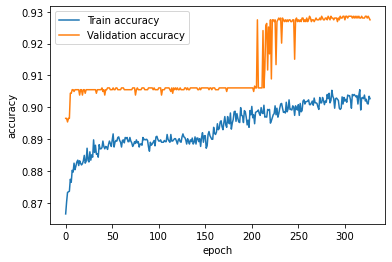

In [45]:
plt.plot(history.history['accuracy'],label = "Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# 검증모델 평가
model.evaluate(val_scaled, val_target)

61/61 [==============================] - 0s 3ms/step - loss: 0.4861 - accuracy: 0.7724


[0.4860553443431854, 0.772445797920227]

In [ ]:
# 테스트 모델 평가
model.evaluate(test_input, test_target)

81/81 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7879


[0.465105265378952, 0.7879257202148438]

In [ ]:
# 예측 모델 생성
y_pred = model.predict(test_input)

87/87 [==============================] - 0s 928us/step


In [ ]:
y_pred.shape

(2763, 4)

In [ ]:
y_pred[:,0].shape

(2763,)

In [ ]:
test_target.shape

(2763,)

In [ ]:
# 예측 모델을 평평하게 만들어줌 
preds_1d = y_pred[:,0].flatten()
preds_1d[:50]

array([0.24345359, 0.20549807, 0.24078453, 0.27776083, 0.24580927,
       0.20627066, 0.22220528, 0.45911703, 0.20606525, 0.25796798,
       0.23021246, 0.24673432, 0.2667747 , 0.20585549, 0.20580265,
       0.20563456, 0.21400747, 0.27462035, 0.27155808, 0.8558801 ,
       0.27155808, 0.20568103, 0.27499214, 0.20659876, 0.20518702,
       0.48657283, 0.27462035, 0.35794544, 0.27960727, 0.20788796,
       0.27465075, 0.26473337, 0.20785052, 0.45477286, 0.20897955,
       0.22965558, 0.25158152, 0.22172426, 0.22875245, 0.20518509,
       0.23768142, 0.61387014, 0.21984568, 0.27353767, 0.27319354,
       0.23633313, 0.20914198, 0.28130424, 0.24673757, 0.2923457 ],
      dtype=float32)

In [ ]:
# 확률 모델을 0.4를 기준으로 0,1로 나눠줌
pred_class = np.where(preds_1d > 0.4, 0 , 1) #0.4보다크면 0, 작으면 1

In [ ]:
pred_class[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
test_target[:50]

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.])

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report
print(classification_report(test_target, pred_class))

ValueError: ignored

[0.         0.61649783 1.        ] [0.         0.92234548 1.        ]


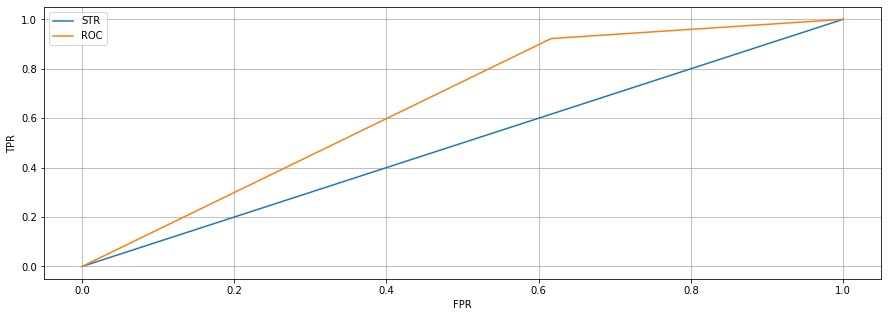

roc auc value 0.6529238270633754


In [ ]:
# ROC AUC CURVE

from sklearn.pipeline import Pipeline as pipe

#df_true = np.where(pred_class == 'OK', 1, 0)
df_true = pred_class
#y_true = np.where(test_target == 'OK', 1, 0)
y_true = test_target
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true, df_true)

print(fpr, tpr)
plt.figure(figsize=(15,5))

# 대각선
plt.plot([0,1],[0,1],label='STR')

# ROC
plt.plot(fpr,tpr,label='ROC')

plt.xlabel('FPR')

plt.ylabel('TPR')

plt.legend()

plt.grid()

plt.show()

print('roc auc value {}'.format(roc_auc_score(test_target,df_true)))

In [ ]:
inputs = np.concatenate(())